In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('precision', 4)

data = pd.read_csv('num_object_results.csv')
data.columns = ['method', 'num_objects', 'num_threads', 'time']
def experiment_name(row):
    return ' - '.join([row.method, 'concurrency=%d' % row.num_threads])
data['Experiment Name'] = data.apply(experiment_name, axis=1)
data['Time Per Object'] =  data.time / data.num_objects
pivot = data.pivot(index='num_objects', columns='Experiment Name', values='time')
alt_pivot = data.pivot(index='num_objects', columns='Experiment Name', values='Time Per Object')
pivot

Experiment Name,Async - concurrency=10,Async - concurrency=30,Async - concurrency=75,Threading - concurrency=10,Threading - concurrency=30,Threading - concurrency=75
num_objects,,,,,,
100,1.3947,1.5680,2.0219,1.7015,3.4560,7.9212
300,3.0787,1.5355,1.2801,3.2193,3.7672,8.2110
1000,9.4879,4.9169,4.2866,8.1255,5.2535,9.7548
3000,31.6204,15.4688,9.4757,27.7525,11.6126,14.1820
10000,120.1521,44.4048,34.6355,96.7135,36.2471,41.0620
30000,339.2108,151.9285,92.4864,308.7067,118.1525,96.4290


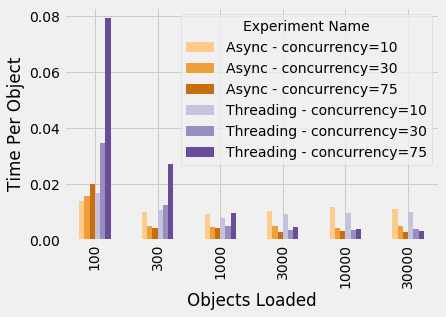

In [2]:
cmap = matplotlib.cm.get_cmap('PuOr')
colors = [cmap(0.35), cmap(0.25), cmap(0.15), cmap(0.65), cmap(0.75), cmap(0.85)]

ax = alt_pivot.plot(kind='bar', color=colors)
ax.set_ylabel('Time Per Object')
ax.set_xlabel('Objects Loaded')
plt.show()

In [3]:
concurrency_data = pd.read_csv('num_threads_results.csv')
concurrency_pivot = concurrency_data.pivot(index='num_threads', columns='method', values='time')
concurrency_pivot

method,Async,Threading
num_threads,,
10,310.2562,274.6713
20,197.7737,150.0259
30,150.5126,105.0349
50,104.1925,94.0746
75,86.3587,93.0178
100,83.4902,97.6200
150,83.2788,102.0889
200,86.1637,131.6094


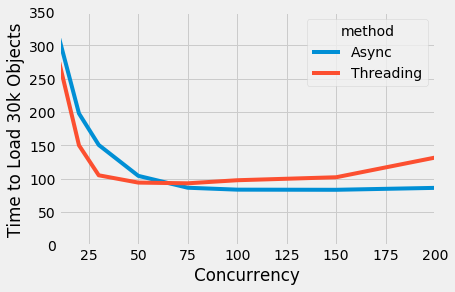

In [4]:
ax2 = concurrency_pivot.plot(ylim=(0, 350))
ax2.set_ylabel('Time to Load 30k Objects')
ax2.set_xlabel('Concurrency')
plt.show()